# Clase #7

In [1]:
import sys
sys.dont_write_bytecode = True

import math
from random import randint, choices
import numpy as np
import cv2 as cv
import lib.image_utils as ImgUtils
import matplotlib.pyplot as plt
%matplotlib inline

import contextlib
with contextlib.redirect_stdout(None):
    np.seterr(divide = 'ignore')

import warnings
warnings.filterwarnings('ignore')

from typing import Callable

In [2]:
def gmm(image:np.ndarray, k: int = 2, max_iters:int = 1000, error:float = 0.00001):
    get_image_dimensions = lambda img: (*img.shape, 1) if len(img.shape) == 2 else img.shape
    normal_prob_distribution_univ = lambda x, m, sd: (1 / (np.sqrt(2 * np.pi) * sd)) * np.exp(-0.5 * ((x - m) / sd)**2)
    
    height, width, channels = get_image_dimensions(image)
    size = height*width
    flattened = image.reshape((size, channels)).astype(float)
    
    mean = flattened[np.random.choice(size, k)]
    std = np.ones((k, channels)) * 3
    phi = np.ones((k,)) / k
    gamma = np.zeros((k, size, channels))

    result = flattened * 1

    for i in range(max_iters):
        for channel in range(channels):
            for cluster in range(k):
                gamma[cluster, :, channel] = phi[cluster] * normal_prob_distribution_univ(flattened[:,channel] , mean[cluster, channel] , std[cluster, channel])
        
            # s1 = np.sum(gamma, axis=1) + 1e-300
            # gamma=gamma/suma.reshape(len(suma),1)
            # suma2=np.sum(gamma,axis=0)
            # phi=suma2/N
            # for k in range(K):
            #     m[k]=np.sum(gamma[:,k]*I)/suma2[k]
            #     std[k]= np.sqrt(np.sum(gamma[:,k]*(I-m[k])**2)/suma2[k])

    for channel in range(channels):
        clusters = np.argmax(gamma[:,:,channel], axis=0)
        for cluster in range(k):
            result[clusters == cluster, channel] = mean[cluster, channel]

    return result.reshape(image.shape).astype(int)

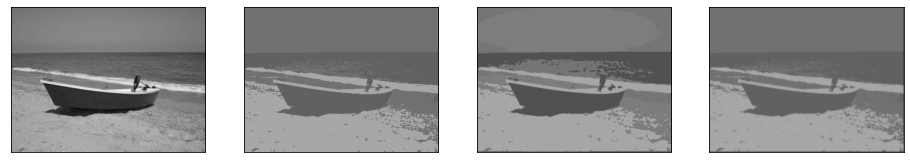

In [3]:
image1 = cv.imread('./images/bote.jpg', cv.IMREAD_GRAYSCALE)

transformed = gmm(image1, k = 4)
ImgUtils.imshow2(
    image1,
    transformed,
    gmm(
        ImgUtils.transform(
            image1,
            ImgUtils.create_gaussian_kernel(11)
        ),
        k = 4
    ),
    ImgUtils.transform(
        transformed,
        ImgUtils.create_gaussian_kernel(11)
    ),
    cols = 4
)

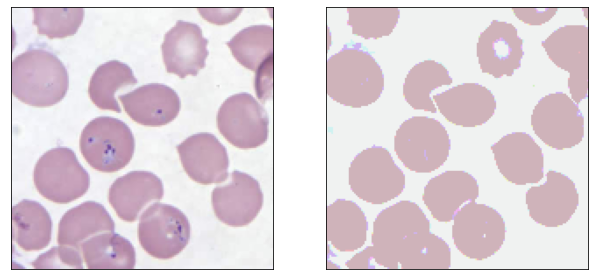

In [20]:
def gmm2(image:np.ndarray, k: int = 2, max_iters:int = 1000, error:float = 0.00001):
    get_image_dimensions = lambda img: (*img.shape, 1) if len(img.shape) == 2 else img.shape
    normal_prob_distribution_univ = lambda x, m, sd: (1 / (np.sqrt(2 * np.pi) * sd)) * np.exp(-0.5 * ((x - m) / sd)**2)
    
    height, width, channels = get_image_dimensions(image)
    size = height*width
    flattened = image.reshape((size, channels)).astype(float)
    
    mean = flattened[np.random.choice(size, k)]
    std = np.ones((k, channels)) * 3
    phi = np.ones((k,)) / k
    gamma = np.zeros((k, size, channels))

    result = flattened * 1

    for i in range(max_iters):
        for channel in range(channels):
            for cluster in range(k):
                gamma[cluster, :, channel] = phi[cluster] * normal_prob_distribution_univ(flattened[:,channel] , mean[cluster, channel] , std[cluster, channel])
            
            clusters = np.argmax(gamma[:,:,channel], axis=0)
            for cluster in range(k):
                result[clusters == cluster, channel] = mean[cluster, channel]

    return result.reshape(image.shape).astype(int)
    
image2 = cv.imread('./images/im1.jpg', cv.COLOR_BGR2RGB)
resized = cv.resize(image2, (150, 150), interpolation = cv.INTER_AREA)
ImgUtils.imshow2(
    resized,
    gmm2(resized, k = 2)
)